# **TASK 1**

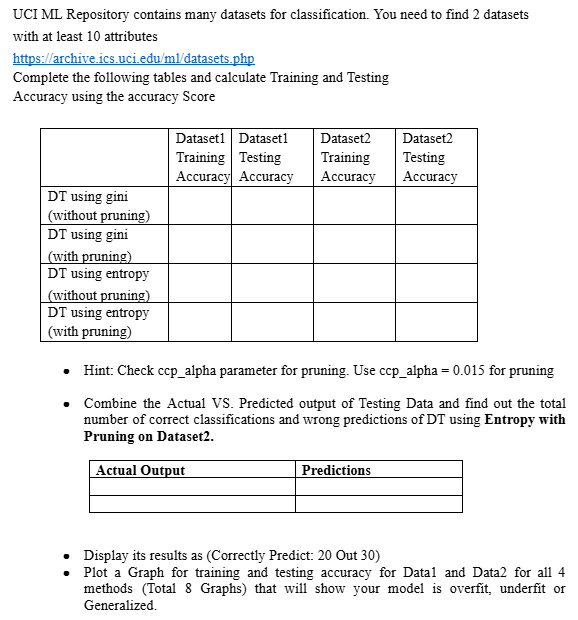

In [ ]:
#DATASET 1 : Heart
#DATASET 2 : Heart Failure Clinical Records

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
data1=pd.read_csv('/content/heart.csv')
data2=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data2

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#check null values in data1
data1.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
#check null values in data2
data2.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data2.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
X=data1.drop('target',axis=1)
y=data1['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title DATASET 1 GINI ACCURACY WITHOUT PRUNING
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 1 GINI WITHOUT PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 1 GINI WITHOUT PRUNING:
Training Accuracy: 100.0 %
Testing Accuracy: 81.9672131147541 %


In [ ]:
# @title DATASET 1 GINI ACCURACY WITH PRUNING
dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.015)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 1 GINI WITH PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 1 GINI WITH PRUNING:
Training Accuracy: 85.53719008264463 %
Testing Accuracy: 75.40983606557377 %


In [ ]:
# @title DATASET 1 ENTROPY ACCURACY WITHOUT PRUNING
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 1 ENTROPY WITHOUT PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 1 ENTROPY WITHOUT PRUNING:
Training Accuracy: 100.0 %
Testing Accuracy: 83.60655737704919 %


In [ ]:
# @title DATASET 1 ENTROPY ACCURACY WITH PRUNING
dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 1 ENTROPY WITH PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 1 ENTROPY WITH PRUNING:
Training Accuracy: 95.86776859504133 %
Testing Accuracy: 81.9672131147541 %


In [ ]:
X=data2.drop('DEATH_EVENT',axis=1)
y=data2['DEATH_EVENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title DATASET 2 GINI ACCURACY WITHOUT PRUNING
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 2 GINI WITHOUT PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 2 GINI WITHOUT PRUNING:
Training Accuracy: 100.0 %
Testing Accuracy: 66.66666666666666 %


In [ ]:
# @title DATASET 2 GINI ACCURACY WITH PRUNING
dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.015)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 2 GINI WITH PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 2 GINI WITH PRUNING:
Training Accuracy: 88.70292887029288 %
Testing Accuracy: 70.0 %


In [ ]:
# @title DATASET 2 ENTROPY ACCURACY WITHOUT PRUNING
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 2 ENTROPY WITHOUT PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 2 ENTROPY WITHOUT PRUNING:
Training Accuracy: 100.0 %
Testing Accuracy: 73.33333333333333 %


In [ ]:
# @title DATASET 2 GINI ACCURACY WITH PRUNING
dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print("DATASET 2 ENTROPY WITH PRUNING:")
acctr=dt.score(X_train,y_train)*100
print("Training Accuracy:",acctr,"%")
accts=accuracy_score(y_test,y_pred)*100
print("Testing Accuracy:",accts,"%")

DATASET 2 ENTROPY WITH PRUNING:
Training Accuracy: 92.88702928870293 %
Testing Accuracy: 70.0 %


In [ ]:
# @title No. of Correct Classifications and Wrong predictions of DT using Entropy with Pruning on Dataset2.
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("Correct Classifications:",cm[0,0]+cm[1,1])
print("Wrong Predictions:",cm[0,1]+cm[1,0])

[[33  2]
 [16  9]]
Correct Classifications: 42
Wrong Predictions: 18


In [ ]:
print("Correctly Predicted",cm[0,0]+cm[1,1],"out of",len(y_pred))

Correctly Predicted 42 out of 60


# **NOTE:**

# **Graphs are not made because accuracy is a single value and graphs cannot be made, also graphs are not important, and making graphs is pointless when you can see accuracy directly, graphs don't add any extra information                  
                                

# **TASK 2**

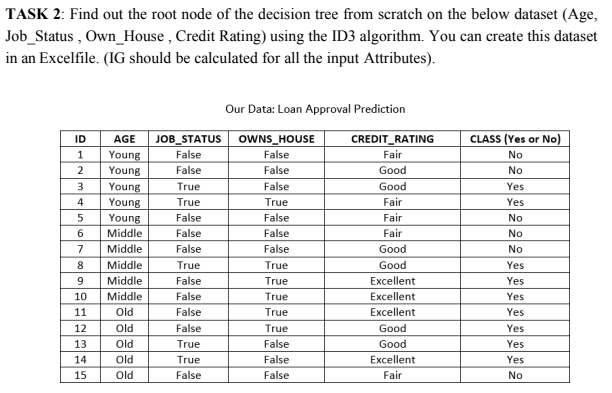

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
loan=pd.read_csv('/content/loan.csv')
loan

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No
5,6,Middle,False,False,Fair,No
6,7,Middle,False,False,Good,No
7,8,Middle,True,True,Good,Yes
8,9,Middle,False,True,Excellent,Yes
9,10,Middle,False,True,Excellent,Yes


In [ ]:
def entropy(target):
    c=pd.Series(target).value_counts()
    weight=c/len(target)
    entropy=-np.sum(weight * np.log2(weight))
    return entropy

def ig(loan,target,feature):
    et = entropy(target)
    val,count=np.unique(loan[feature], return_counts=True)
    ws=0
    for i in range(len(val)):
        s=loan[loan[feature]==val[i]]
        ent=entropy(s['CLASS'])
        ws+=(count[i]/np.sum(count))*ent
    ig=et-ws
    return ig

features=['AGE', 'JOB_STATUS', 'OWNS_HOUSE', 'CREDIT_RATING']
igs={}

for f in features:
    i=ig(loan,loan['CLASS'],f)
    igs[f]=i
    print(f'Information Gain for {f}: {i:.2f}')

root=max(igs, key=igs.get)
print('\nRoot Node:', root)

Information Gain for AGE: 0.08
Information Gain for JOB_STATUS: 0.32
Information Gain for OWNS_HOUSE: 0.42
Information Gain for CREDIT_RATING: 0.36

Root Node: OWNS_HOUSE


# **TASK 3**

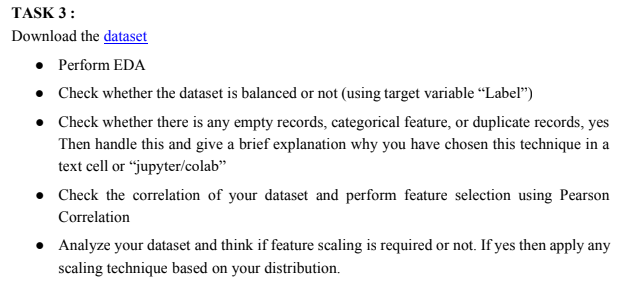

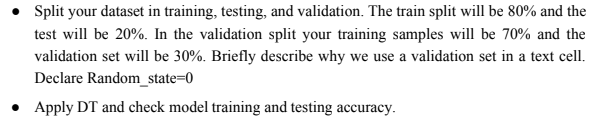

In [ ]:
# @title Loading the Dataset
import pandas as pd
cancer=pd.read_csv('cancer patient data sets.csv')
cancer

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# @title Performing EDA
cancer.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


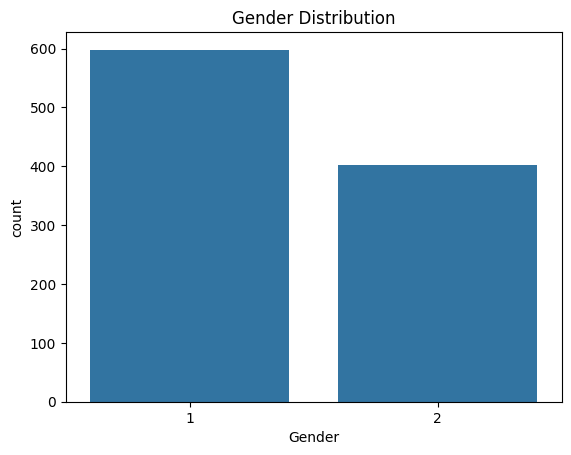

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', data=cancer)
plt.title("Gender Distribution")
plt.show()

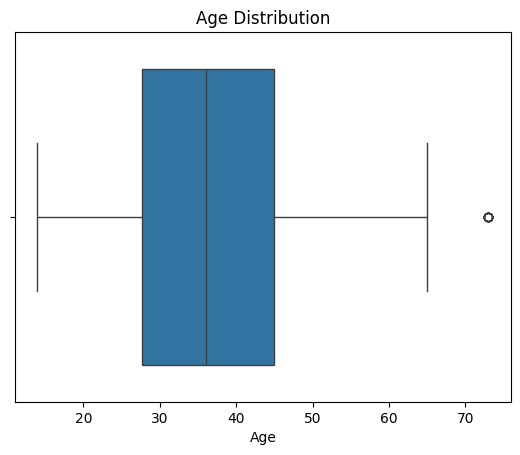

In [ ]:
sns.boxplot(x='Age', data=cancer)
plt.title("Age Distribution")
plt.show()

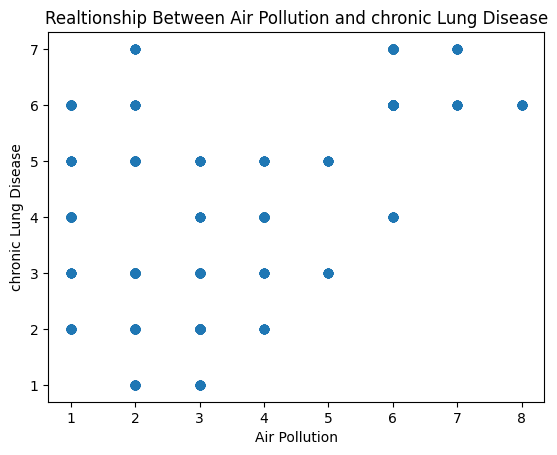

In [ ]:
plt.scatter(cancer['Air Pollution'], cancer['chronic Lung Disease'])
plt.xlabel('Air Pollution')
plt.ylabel('chronic Lung Disease')
plt.title('Realtionship Between Air Pollution and chronic Lung Disease')
plt.show()

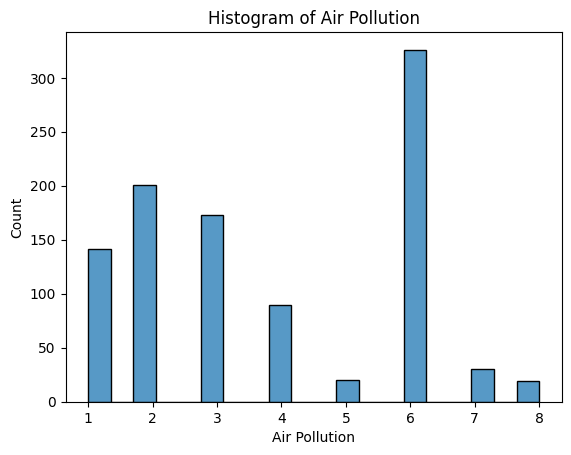

In [ ]:
sns.histplot(cancer['Air Pollution'], bins=20)
plt.title('Histogram of Air Pollution')
plt.show()

Text(0, 0.5, 'Weight Loss')

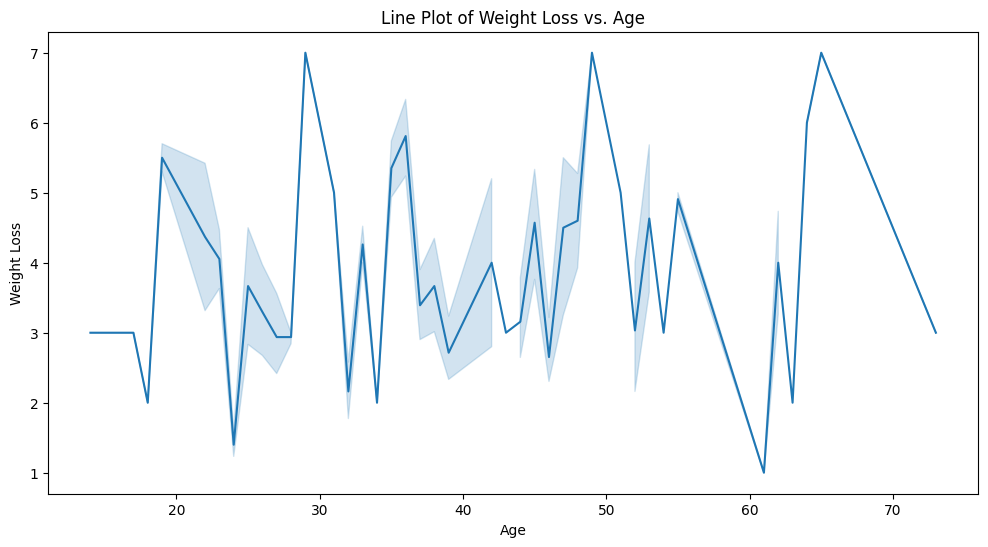

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancer, x='Age', y='Weight Loss')
plt.title('Line Plot of Weight Loss vs. Age')
plt.xlabel('Age')
plt.ylabel('Weight Loss')

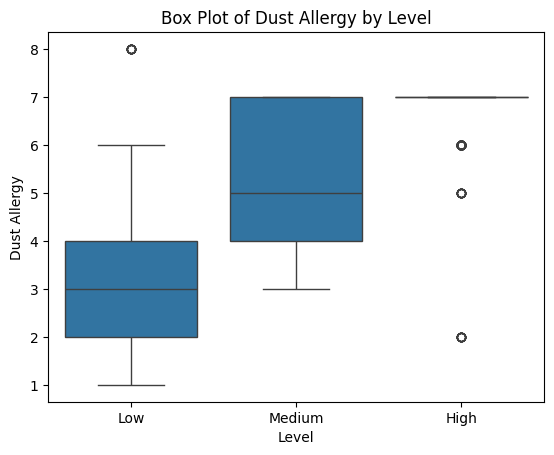

In [ ]:
sns.boxplot(data=cancer, x='Level', y='Dust Allergy')
plt.title('Box Plot of Dust Allergy by Level')
plt.xlabel('Level')
plt.ylabel('Dust Allergy')
plt.show()


In [ ]:
# @title Checking Balance
cancer['Level'].value_counts()


,count
Level,
High,365
Medium,332
Low,303


The dataset is balanced because the counts for each class are not drastically different.

In [ ]:
# @title Checking for Null and Duplicated Values
print(cancer.isnull().sum())
print("\nNo. of Duplicated Rows: ",cancer.duplicated().sum())

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

No. of Duplicated Rows:  0


No Null Values and No Duplicates

In [ ]:
# @title Turning Target Variable 'Level' into Numeric Data
cancer['Level']=cancer['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [ ]:
# @title Dropping Unnecessary Columns
cancer.drop('Patient Id', axis=1, inplace=True)

In [ ]:
cancer.drop('index', axis=1, inplace=True)

In [ ]:
# @title Correlation Matrix
xcancer=cancer.drop('Level',axis=1)
ycancer=cancer['Level']

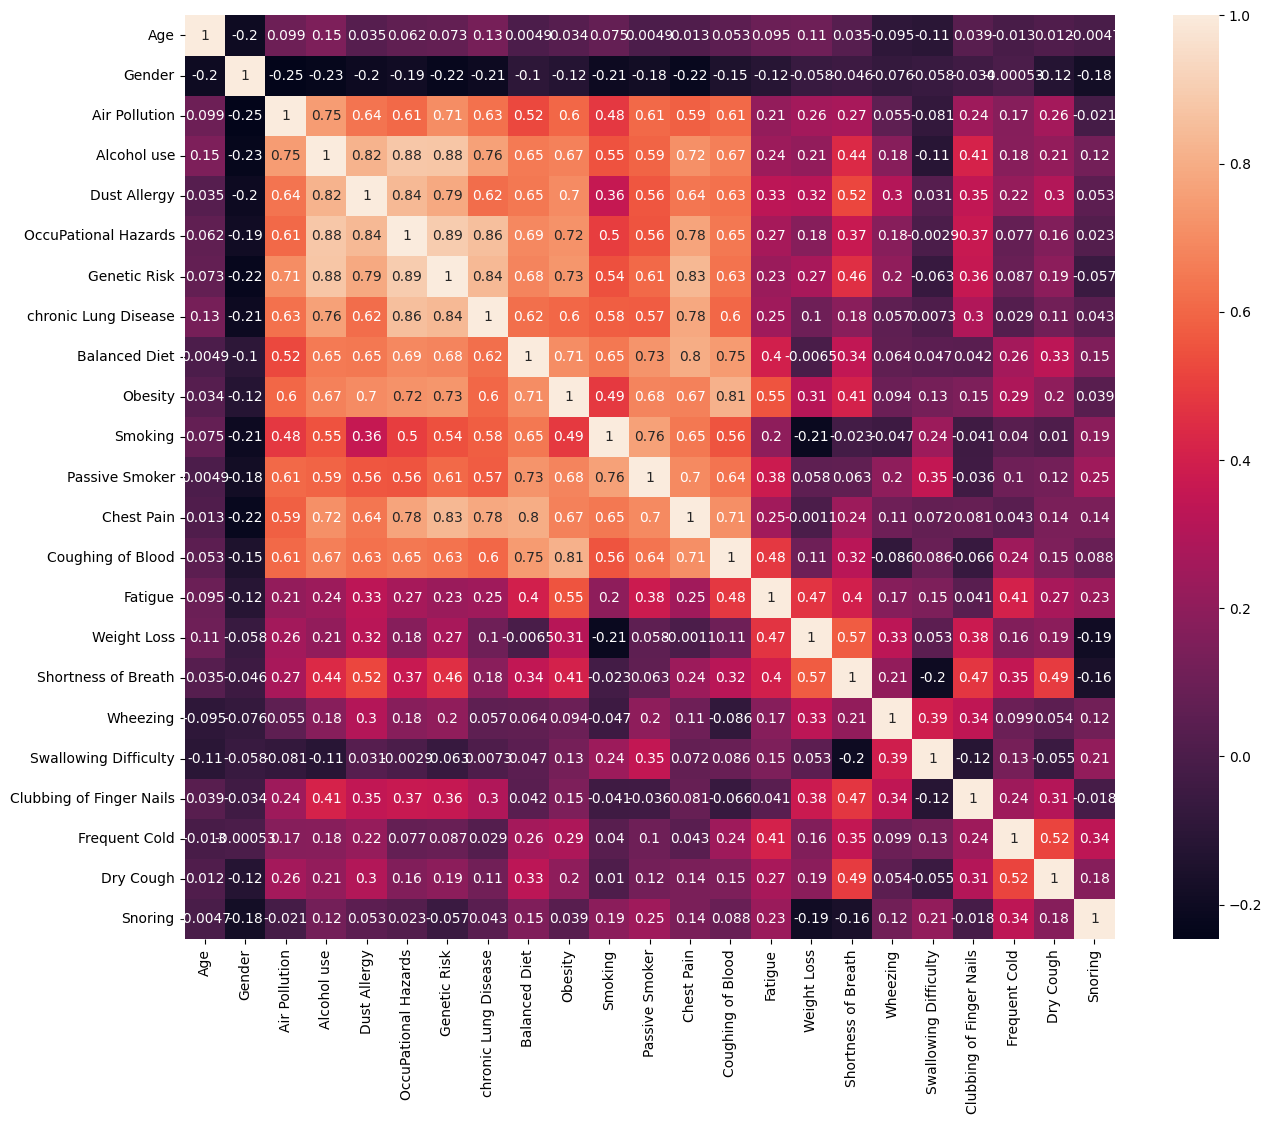

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=xcancer.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
# @title Feature Selection
cm=xcancer.corr()
hc=set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j]) > 0.5:
            col = cm.columns[i]
            hc.add(col)
xcancer.drop(columns=hc,inplace=True)

In [ ]:
xcancer

,Age,Gender,Air Pollution,Weight Loss,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Snoring
0,33,1,2,4,2,3,1,2,4
1,17,1,3,3,8,6,2,1,2
2,35,1,4,7,2,1,4,6,2
3,37,1,7,2,1,4,5,6,5
4,46,1,6,2,1,4,2,4,3
...,...,...,...,...,...,...,...,...,...
995,44,1,6,3,7,8,2,4,3
996,37,2,6,6,7,2,4,3,4
997,25,2,4,7,2,1,4,6,2
998,18,2,6,2,1,4,2,4,3


In [ ]:
# @title Splitting into Train and Test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xcancer,ycancer,test_size=0.2,random_state=42)

In [ ]:
# @title Scaling Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

Scaling is necessary because age ranges from 1 to 100 approx

In [ ]:
# @title Splitting Validation Data into Train and Test
xtrainval,xtestval,ytrainval,ytestval=train_test_split(xtrain,ytrain,test_size=0.3,random_state=0)

A validation set helps tune the model. It also does prevent overfitting and gives a realistic estimate of the model’s performance.

In [ ]:
# @title Testing and Training Accuracies
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
y_pred=clf.predict(xtest)
print("Testing Accuracy:",accuracy_score(ytest,y_pred))
clf.fit(xtrainval,ytrainval)
y_pred=clf.predict(xtrainval)
print("Training Accuracy:",accuracy_score(ytrainval,y_pred))

Testing Accuracy: 1.0
Training Accuracy: 1.0


# **TASK 4**

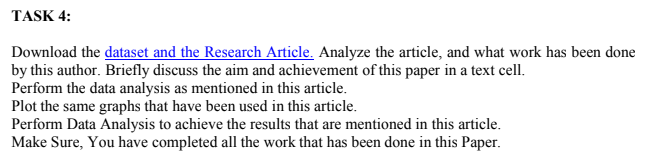

# Aim
The aim of this work is to utilize the Prophet model to analyze and forecast the spread of COVID-19 in Algeria by training the model on historical data to predict future cases and deaths. Additionally, it seeks to enhance understanding of the virus's dynamics by constructing a comprehensive dataset from reliable sources and performing large-scale data analysis across 82 countries worldwide, thus providing insights into both local and global epidemic patterns.


# Achievement
The work achieved accurate COVID-19 forecasting in Algeria using a Prophet model, with low RMSE scores for cases and deaths. It also conducted a global analysis across 82 countries, revealing key correlations with various factors influencing the virus's spread. The results suggest future increases in cases and deaths and offer insights into factors affecting the epidemic.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Data (1).csv")
a=df[df['Entity']=='Algeria']

<ipython-input-14-7d5d1771ada6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cases_Per_Day']=data['Cases'].diff().fillna(0)


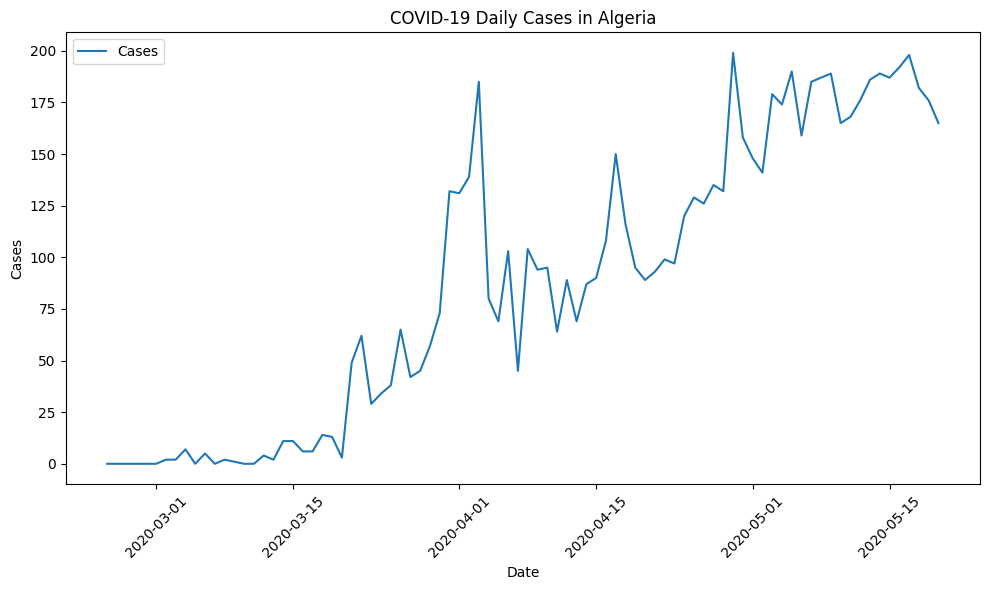

In [ ]:
# @title Cases per day in Algeria
df['Date'] = pd.to_datetime(df['Date'])
a=df[df['Entity'] == 'Algeria']
data=a[a['Date'] <= '2020-05-20']
data['Cases_Per_Day']=data['Cases'].diff().fillna(0)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Cases_Per_Day'], label='Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Daily Cases in Algeria')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-15-fc4bfaf89338>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Deaths_Per_Day']=data['Deaths'].diff().fillna(0)


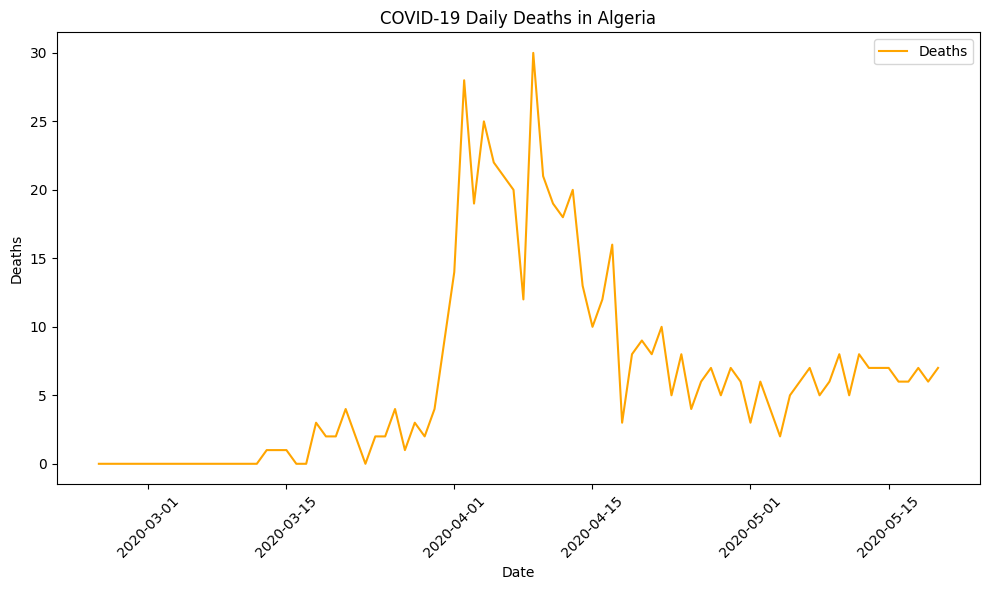

In [ ]:
# @title Deaths per day in Algeria
df['Date'] = pd.to_datetime(df['Date'])
a=df[df['Entity'] == 'Algeria']
data=a[a['Date'] <= '2020-05-20']
data['Deaths_Per_Day']=data['Deaths'].diff().fillna(0)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Deaths_Per_Day'], color='orange', label='Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('COVID-19 Daily Deaths in Algeria')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Predicition graphs cannot be made as we have not studied the prophet model, and in order to make such graphs you need predictions which will be found using the model. So predictions graphs cannot be made right now.

In [ ]:
# @title Data Description
df.groupby('Entity').describe()

Latitude                                            \
                 count   mean    min    25%    50%    75%    max   
Entity                                                             
Albania          370.0  41.15  41.15  41.15  41.15  41.15  41.15   
Algeria          370.0  28.03  28.03  28.03  28.03  28.03  28.03   
Argentina        404.0 -38.42 -38.42 -38.42 -38.42 -38.42 -38.42   
Armenia          365.0  40.07  40.07  40.07  40.07  40.07  40.07   
Australia        400.0 -25.27 -25.27 -25.27 -25.27 -25.27 -25.27   
...                ...    ...    ...    ...    ...    ...    ...   
United States    404.0  37.09  37.09  37.09  37.09  37.09  37.09   
Uruguay          353.0 -32.52 -32.52 -32.52 -32.52 -32.52 -32.52   
Vietnam          403.0  14.06  14.06  14.06  14.06  14.06  14.06   
Zambia           348.0 -13.13 -13.13 -13.13 -13.13 -13.13 -13.13   
Zimbabwe         346.0 -19.02 -19.02 -19.02 -19.02 -19.02 -19.02   

                            Longitude          ...       Cases                \
                        std     count    mean  ...         max           std   
Entity                                         ...                             
Albania        7.115049e-15     370.0   20.17  ...    107167.0  2.937400e+04   
Algeria        3.557524e-15     370.0    1.66  ...    113092.0  3.853282e+04   
Argentina      7.114238e-15     404.0  -63.62  ...   2107365.0  7.319898e+05   
Armenia        0.000000e+00     365.0   45.04  ...    172058.0  6.222818e+04   
Australia      0.000000e+00     400.0  133.78  ...     28978.0  1.133901e+04   
...                     ...       ...     ...  ...         ...           ...   
United States  1.422848e-14     404.0  -95.71  ...  28605669.0  8.724439e+06   
Uruguay        7.115513e-15     353.0  -55.77  ...     57994.0  1.493529e+04   
Vietnam        0.000000e+00     403.0  108.28  ...      2448.0  6.429597e+02   
Zambia         1.778915e-15     348.0   27.85  ...     78534.0  1.914506e+04   
Zimbabwe       3.557859e-15     346.0   29.15  ...     36089.0  1.068377e+04   

              Deaths                                                      \
               count           mean  min        25%       50%        75%   
Entity                                                                     
Albania        355.0     484.202817  1.0      34.00     306.0     830.50   
Algeria        354.0    1547.579096  1.0     717.25    1544.0    2459.75   
Argentina      358.0   18499.058659  1.0     636.00    9239.5   38878.50   
Armenia        340.0    1260.817647  1.0     316.50     910.0    2313.25   
Australia      365.0     511.164384  1.0     102.00     652.0     908.00   
...              ...            ...  ...        ...       ...        ...   
United States  366.0  199648.846995  1.0  107626.50  183487.0  270102.00   
Uruguay        338.0     108.917160  1.0      25.00      45.0      81.75   
Vietnam        213.0      32.737089  3.0      35.00      35.0      35.00   
Zambia         333.0     289.663664  1.0      18.00     324.0     364.00   
Zimbabwe       343.0     287.020408  1.0       4.00     222.0     286.00   

                                        
                    max            std  
Entity                                  
Albania          1796.0     515.927324  
Algeria          2983.0     934.357831  
Argentina       51965.0   19089.028174  
Armenia          3192.0    1092.408879  
Australia         909.0     392.899059  
...                 ...            ...  
United States  513091.0  137270.390288  
Uruguay           608.0     154.288947  
Vietnam            35.0       6.462255  
Zambia           1091.0     268.088618  
Zimbabwe         1463.0     397.634897  

[104 rows x 104 columns]

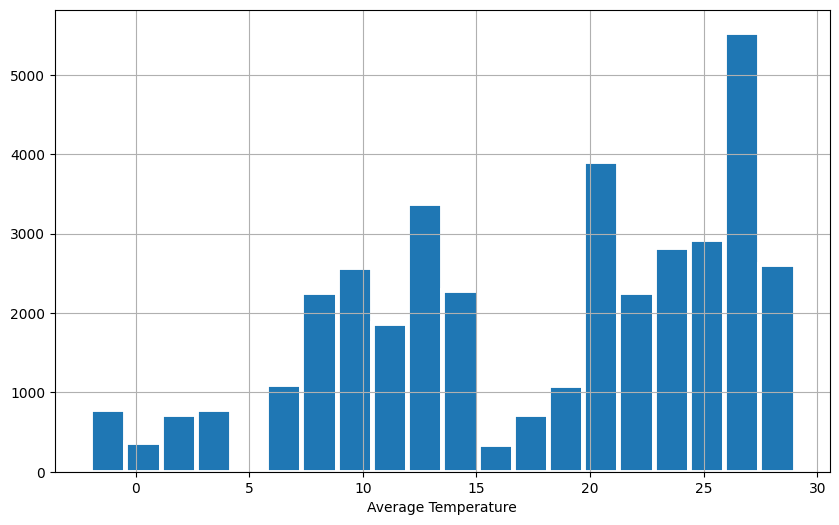

In [ ]:
# @title Average Temperature per year
plt.figure(figsize=(10, 6))
plt.hist(df['Average temperature per year'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Average Temperature')
plt.grid(True)
plt.show()

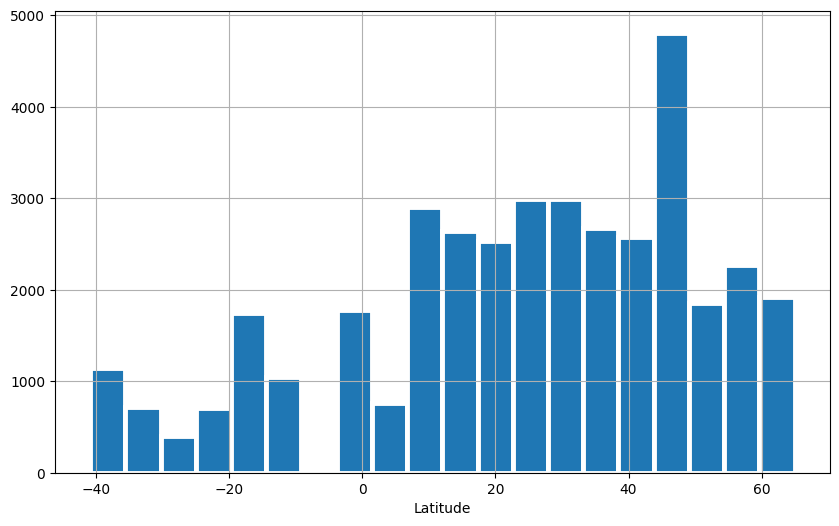

In [ ]:
# @title Latitude
plt.figure(figsize=(10, 6))
plt.hist(df['Latitude'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Latitude')
plt.grid(True)
plt.show()

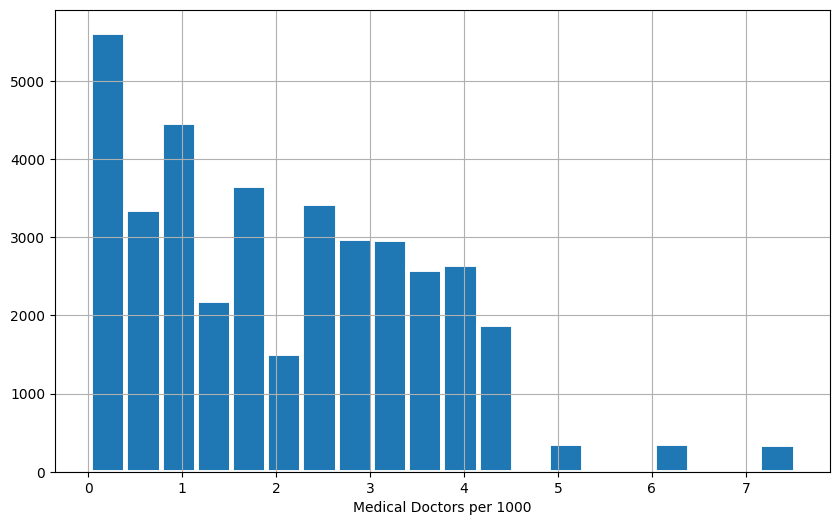

In [ ]:
# @title Medical Doctors Per 1000
plt.figure(figsize=(10, 6))
plt.hist(df['Medical doctors per 1000 people'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Medical Doctors per 1000')
plt.grid(True)
plt.show()

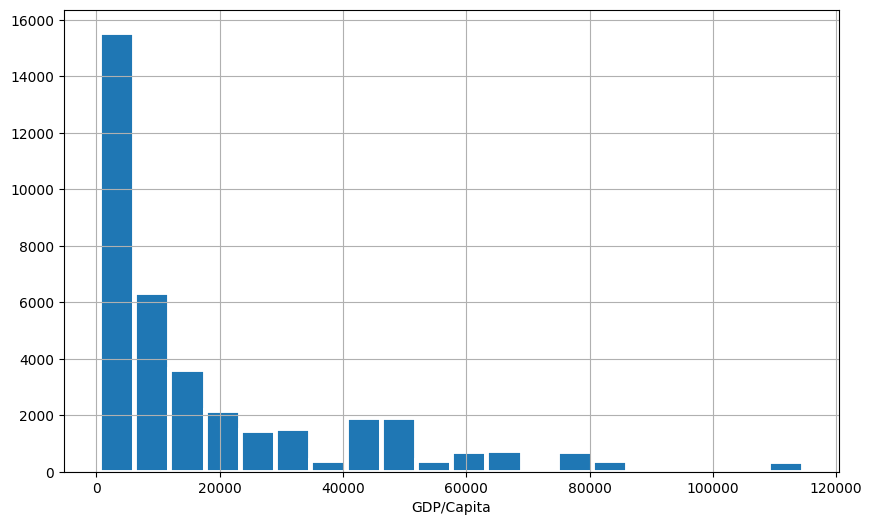

In [ ]:
# @title GDP/Capita
plt.figure(figsize=(10, 6))
plt.hist(df['GDP/Capita'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('GDP/Capita')
plt.grid(True)
plt.show()

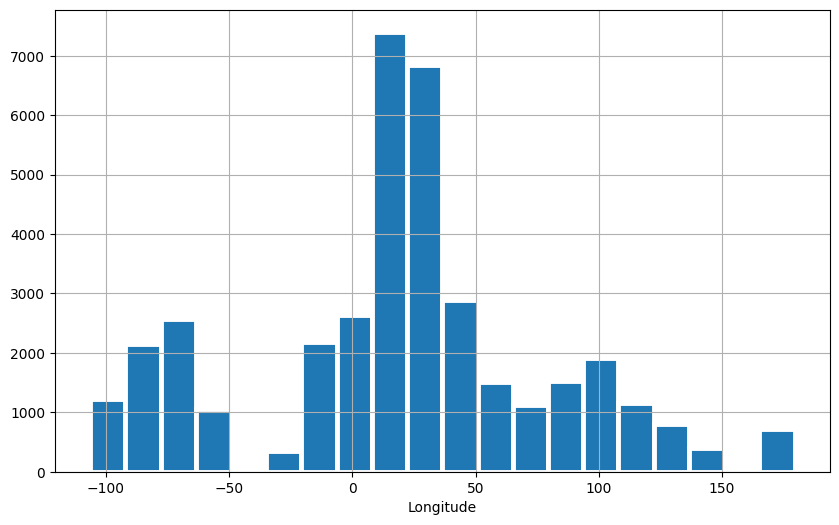

In [ ]:
# @title Longitude
plt.figure(figsize=(10, 6))
plt.hist(df['Longitude'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Longitude')
plt.grid(True)
plt.show()

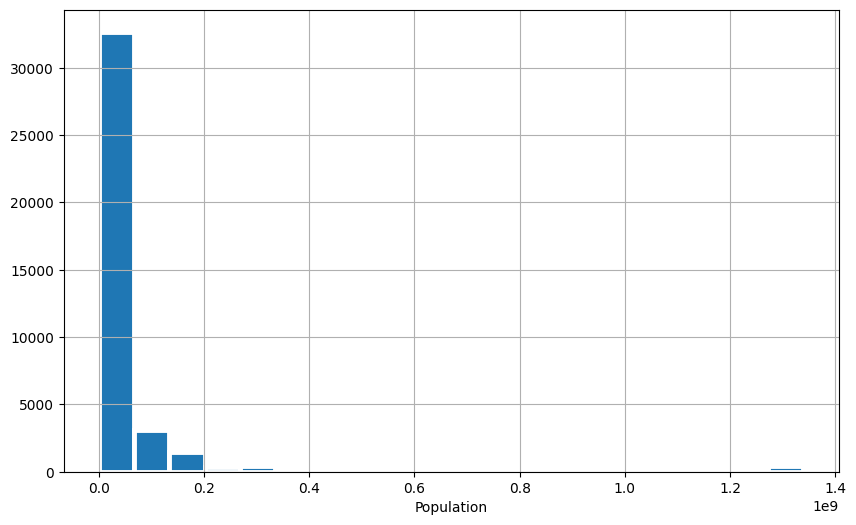

In [ ]:
# @title Population
plt.figure(figsize=(10, 6))
plt.hist(df['Population'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Population')
plt.grid(True)
plt.show()

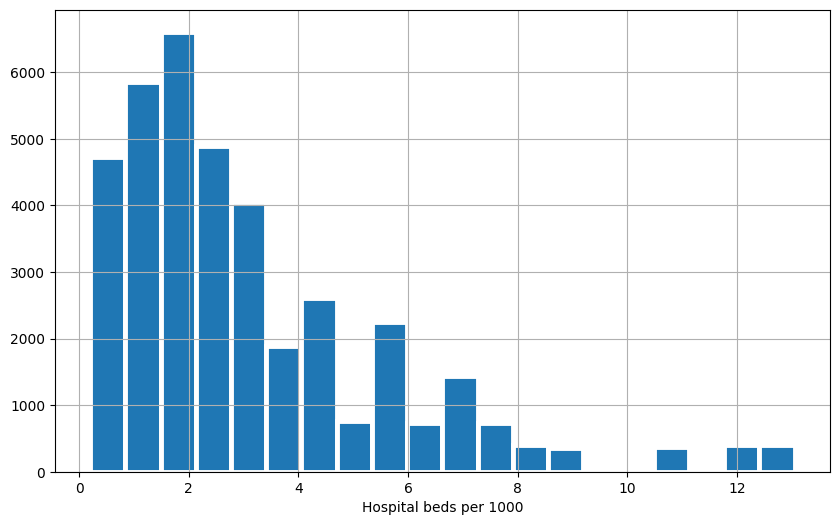

In [ ]:
# @title Hospital beds Per 1000
plt.figure(figsize=(10, 6))
plt.hist(df['Hospital beds per 1000 people'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Hospital beds per 1000')
plt.grid(True)
plt.show()

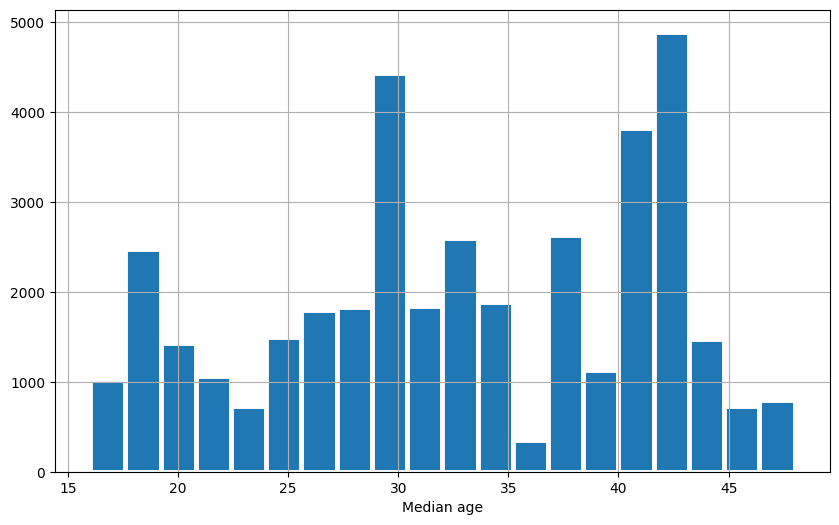

In [ ]:
# @title Median age
plt.figure(figsize=(10, 6))
plt.hist(df['Median age'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Median age')
plt.grid(True)
plt.show()

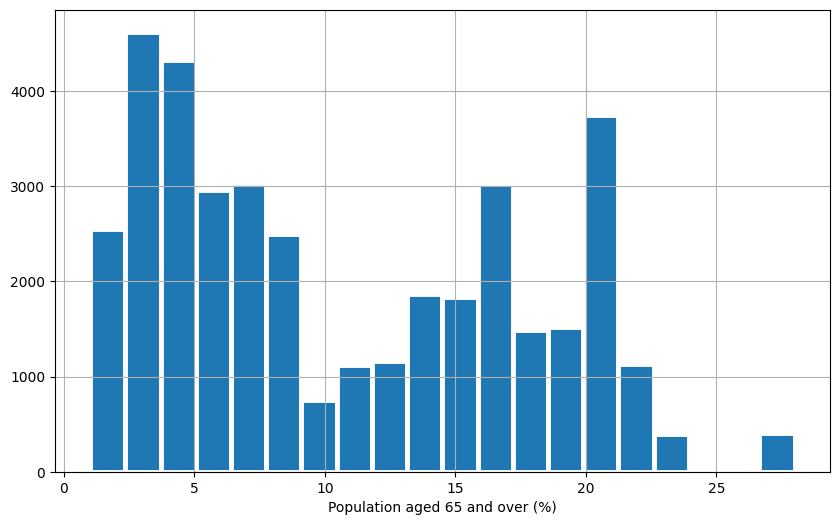

In [ ]:
# @title Population aged 65 and over (%)
plt.figure(figsize=(10, 6))
plt.hist(df['Population aged 65 and over (%)'], bins=20, edgecolor='white',linewidth=3.5)
plt.xlabel('Population aged 65 and over (%)')
plt.grid(True)
plt.show()

In [ ]:
df2=df.drop(['Entity','Continent'],axis=1)
data=df2[df2['Date'] == '2020-05-19']
data=data.drop(['Date'],axis=1)

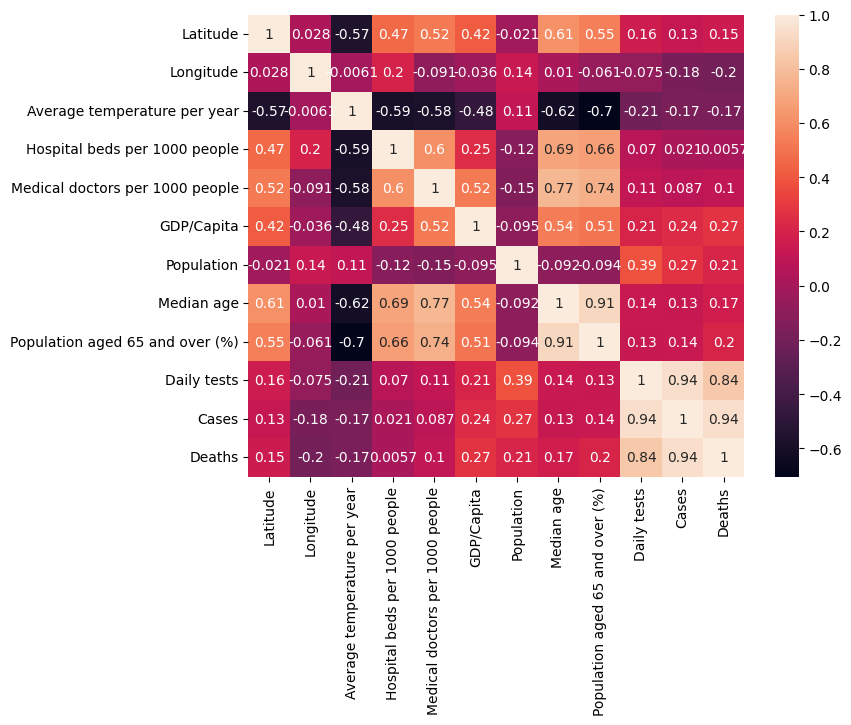

In [ ]:
# @title Feature correlation in all countries as of 19/05/2020
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
plt.show()

# **TASK 5**

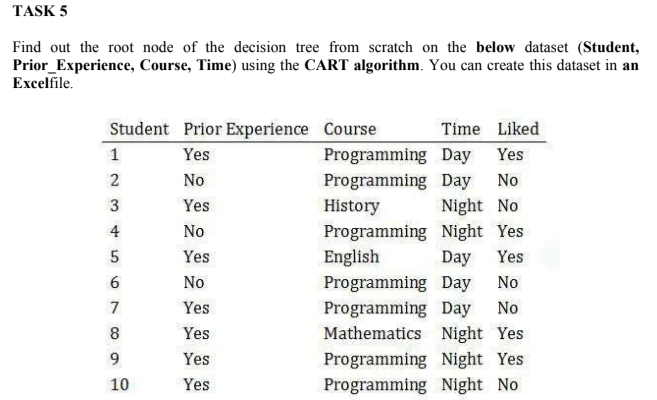

In [ ]:
student=pd.read_csv("student.csv")
student

,Student,Prior_Experience,Course,Time,Liked
0,1,Yes,Programming,Day,Yes
1,2,No,Programming,Day,No
2,3,Yes,History,Night,No
3,4,No,Programming,Night,Yes
4,5,Yes,English,Day,Yes
5,6,No,Programming,Day,No
6,7,Yes,Programming,Day,No
7,8,Yes,Maths,Night,Yes
8,9,Yes,Programming,Night,Yes
9,10,Yes,Programming,Night,No


In [ ]:
student=student.drop(['Student'],axis=1)
#dropping student because it is an index and doesnt help in decision tree

In [ ]:
import numpy as np

In [ ]:
def gini(target):
    c=pd.Series(target).value_counts()
    weight=c/len(target)
    gini=1-np.sum(weight ** 2)
    return gini

def gain(student,target,feature):
    val,count=np.unique(student[feature], return_counts=True)
    ws=0
    for i in range(len(val)):
        s=student[student[feature]==val[i]]
        gin=gini(s['Liked'])
        ws+=(count[i]/np.sum(count))*gin
    return ws

features=['Prior_Experience','Course','Time']
gains={}

for f in features:
    g=gain(student,student['Liked'],f)
    gains[f]=g
    print(f'Gini Gain for {f}: {g:.3f}')

root=min(gains, key=gains.get)
print('\nRoot Node:', root)

Gini Gain for Prior_Experience: 0.476
Gini Gain for Course: 0.343
Gini Gain for Time: 0.480

Root Node: Course
